## MSIN0032 Dissertation: Assessing the impact of machine learning in the fashion indutry to improve customer personalisation


Author: Jeremy Yao

## Introduction


The goal is to analyse the views of survey participants on new machine learning techniques in the customer journey for the fashion industry.

In [665]:
# Import basic libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Import data preprocessing libraries
from sklearn import preprocessing

# import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import ggplot
from ggplot import *
%matplotlib inline

#import libraries for model selection 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

#import libraries for ensemble learning
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

import re 


In [748]:
#Install a pip package in the current Jupyter kernel
#import sys
#!{sys.executable} -m pip install graphviz

In [667]:
#import warnings
#warnings.filterwarnings('ignore')

## Data Import
Our dataset is from a Google form survey: a csv file containing information on 107 participants and X predicting attributes. The independent variables contained are either nominal or numerical. The dependent variables are the participants willingness to use Visual Search.

In [668]:
# Load data
train_data = pd.read_csv("dataset_gforms.csv")

## Data Transformation and Exploration
For simplicity, we rename the default column names and drop (delete) the ones that are optional and qualitative.

In [669]:
df = train_data

# Delete the "Timestamp" column from the dataframe
df = df.drop("Timestamp", axis=1)

# Delete the "Email address" column from the dataframe
df = df.drop("Email address", axis=1)

# Delete the feedback column from the dataframe
df = df.drop("Any other thoughts on the topic/Any feedback to improve the questionnaire?", axis=1)

# Delete the reasons for good exp column from the dataframe
df = df.drop("If yes, could you give reasons for the good or bad experience?", axis=1)

# Delete the purchase platform column from the dataframe
df = df.drop("If online, which platform do you use?", axis=1)

# Rename the Age column
df = df.rename(columns={"How old are you? [Age]": "Age_group"})

# Rename the Gender columnn 
df = df.rename(columns={"What is your gender?": "Gender"})

# Rename the Occupation columnn 
df = df.rename(columns={"What is your occupation ?": "Occupation"})

# Rename the Work Place columnn 
df = df.rename(columns={"Where do you work/study? (Company - School)": "Work_Place"})

# Rename the Industry columnn 
df = df.rename(columns={"What industry do you work in? Which domain are you studying?": "Industry"})

# Rename the Purchase Frequency columnn 
df = df.rename(columns={"How often do you buy new clothes?": "Purchase_Frequency"})

# Rename the Purchase Monthly columnn 
df = df.rename(columns={"How much do you spend on clothing per month?": "Amount_Monthly"})

# Rename the Is a Luxury Brand Customercolumnn 
df = df.rename(columns={"Are you a consumer of the following brands:": "LB_consumer"})

# Rename the Customer Segment columnn 
df = df.rename(columns={"Do you consider yourself as a consumer of...": "Customer_Segment"})

# Rename the Purchase Platform columnn 
df = df.rename(columns={"What platform do you usually buy clothes?": "Purchase_Platform"})

# Rename the Online Segment columnn 
#df = df.rename(columns={"If online, which platform do you use?": "Online_Segment"})

# Rename the AI views Segment columnn 
df = df.rename(columns={" 'The overall fashion industry will become better from increased use of AI'": "AI_views"})

# Rename the Visual Search Scenario columnn 
df = df.rename(columns={"Have you ever had an experience where you saw clothing on social media (e.g. Instagram) or in real life that you liked but couldn’t find out where they were from?": "VS_Scenario"})

# Rename the Potential of using VS columnn 
df = df.rename(columns={"'I think using the visual search tool would be convenient in finding the clothes I want'": "VS_Friendly"})

# Rename the Potential of using VS 2 columnn 
df = df.rename(columns={"'I would be comfortable using the visual search technology'": "VS_Friendly_2"})

# Rename the Outfit columnn 
df = df.rename(columns={"Where do you get your outfit inspiration? Which of the followings influences it most?": "Outfit"})

# Rename the Previous Chatbot Experience columnn 
df = df.rename(columns={"Have you ever had an experience with contemporary chatbots?": "CB_Exp_Boolean"})

# Rename the Purchase Platform columnn 
df = df.rename(columns={"If yes, was the chatbot useful? Did you have an overall good experience?": "CB_Exp"})

# Rename the Purchase Platform columnn 
df = df.rename(columns={"What platform do you usually buy clothes?": "Purchase_Platform"})

# Rename the Potential of using CB columnn 
df = df.rename(columns={"'I would be comfortable communicating with an AI chatbot'": "CB_Friendly"})

# Rename the Potential of using CB columnn 
df = df.rename(columns={"'Communicating with an AI virtual assistant will be convenient and efficient to address any questions or concerns'": "CB_Friendly_2"})

# Rename the Tailored experience columnn 
df = df.rename(columns={"'I want to have a tailored recommendation of products.'": "Tailored_Exp"})

# Rename the Data Privacy columnn 
df = df.rename(columns={"'I don't mind if a company uses my data for the purpose of improving my overall shopping experience'": "Data_Privacy"})


### Feature Engineering

Creating new attributes, changing the values of variables from string to integer category to make the data analysis smoother.

In [670]:
def category_to_numeric(x):
    if x=='Under 18':
        return 1
    if x=='18 to 24':
        return 2
    if x=='25 to 34':
        return 3
    if x=='34 to 54':
        return 4
    if x=='55 to 64':
        return 5
    if x=='over 64':
        return 6
#Note that there are none from category 5 or 6

def Purchase_frequency_cat(x):
    if x=='Less often':
        return 1
    if x=='Several times per year':
        return 2
    if x=='Several times per month':
        return 3
    if x=='Several times per week':
        return 4

In [671]:
df['Age_group'] = df['Age_group'].apply(category_to_numeric)
df['Purchase_Frequency'] = df['Purchase_Frequency'].apply(Purchase_frequency_cat)


### Transforming the list of characters into list of strings

Some of the attributes are made of a list of characters and we want to convert them into a list of string to cast them into integers more easily. 

In [672]:
#the lists "LB_consumer", "Customer_Segment", "Outfit", "Purchase_Platform" consists only of series of characters, we will convert it to a list of strings.
#we concatenate all the characters to form a single string that we will separate using comas after
for i in range(0,len(df.LB_consumer)):
    ''.join(df.LB_consumer[i][0])
    ''.join(df.Customer_Segment[i][0])
    ''.join(df.Purchase_Platform[i][0])
    ''.join(df.Outfit[i][0])


# Here we are deleting what is inside the parenthesis as there are comas inside and it will hinder the conversion process

for i in range(0,len(df.Customer_Segment)):
    df.Customer_Segment[i] = re.sub("([\(\[]).*?([\)\]])", "\g<1>\g<2>", df.Customer_Segment[i])
    
#Here we are separating the singles strings into a list of strings
    
for i in range(0,len(df.LB_consumer)):
    df.LB_consumer[i] = [x.strip() for x in df.LB_consumer[i].split(',')]
    df.Customer_Segment[i] = [x.strip() for x in df.Customer_Segment[i].split(',')]
    df.Purchase_Platform[i] = [x.strip() for x in df.Purchase_Platform[i].split(',')]    
    df.Outfit[i] = [x.strip() for x in df.Outfit[i].split(',')]  

In [673]:
# Filling the missing values 'NaN' with zeros
df.CB_Exp = df.CB_Exp.fillna(0)

### Converting the string category list into list of numbers

In [674]:
def Customer_Segment_cat(x):
    if x=='Independent Brands':
        return 0
    if x=='Lower price clothing ()':
        return 1
    if x=='Second-Hands ()':
        return 2
    if x=='High-street brands ()':
        return 3
    if x=='High-end high-street brands ()':
        return 4
    if x=='Ready-to-wear luxury fashion ()':
        return 5
    if x=='High-end high-street brands ()':
        return 6
    if x=='Haute Couture & Designer brands ()':
        return 7

def Outfit_cat(x):
    if x=='People on the street':
        return 1
    if x=='From your friend and family circle':
        return 2
    if x=='Instagram':
        return 3
    if x=='Pinterest':
        return 3
    if x=='Retail shops':
        return 4
    if x=='Runways':
        return 5
    else:
        return 0

def gender_cat(x):
    if x=='Male':
        return 1
    if x=='Female':
        return 0

def occupation_cat(x):
    if x=='Student':
        return 1
    if x=='Professional':
        return 2
    else:
        return 3
    
    
def Amount_Monthly_cat(x):
    if x=='£0-49':
        return 1
    if x=='£50-149':
        return 2
    if x=='£150-249':
        return 3
    if x=='£250-499':
        return 3
    if x=='£500+':
        return 4

def Boolean_cat(x):
    if x=='Yes':
        return 1
    if x=='No':
        return 0

def platform_cat(x):
    if x=='Retail':
        return -1.0
    if x=='Online - Computer & Tablets':
        return 0.75
    if x=='Online - Mobile':
        return 0.75
    else:
        return 0

In [675]:
df['VS_Scenario'] = df['VS_Scenario'].apply(Boolean_cat)
df['CB_Exp_Boolean'] = df['CB_Exp_Boolean'].apply(Boolean_cat)
df['Gender'] = df['Gender'].apply(gender_cat)
df['Occupation'] = df['Occupation'].apply(occupation_cat)
df['Amount_Monthly'] = df['Amount_Monthly'].apply(Amount_Monthly_cat)

In [676]:
for i in range(0, len(df.Customer_Segment)):
    for j in range(0, len(df.Customer_Segment[i])):
        df['Customer_Segment'][i][j] = Customer_Segment_cat(df['Customer_Segment'][i][j])
        
for i in range(0, len(df.Outfit)):
    for j in range(0, len(df.Outfit[i])):
        df['Outfit'][i][j] = Outfit_cat(df['Outfit'][i][j])

for i in range(0, len(df.Purchase_Platform)):
    for j in range(0, len(df.Purchase_Platform[i])):
        df['Purchase_Platform'][i][j] = platform_cat(df['Purchase_Platform'][i][j])

Creating a new column feature to see if the participants are a consumer of Kering brands.

In [677]:


'''
Here if the customer shops at any Kering company, regardless if they also purchase at competitor LVMH, 
we will assign them a score of +1.

However, if the customer only purchases at the competitor, we will assign them a score of -1. If the 
customer is a client of neither LVMH nor Kering, we will leave them with a score of 0.
'''

df.insert(8, 'Kering_customer', 0)

for i in range(0, len(df.LB_consumer)):
    for j in range(0, len(df.LB_consumer[i])):
        if (df.LB_consumer[i][j] == 'Gucci'):
            df.Kering_customer[i] = 1
        elif (df.LB_consumer[i][j] == 'Saint Laurent'):
            df.Kering_customer[i] = 1
        elif (df.LB_consumer[i][j] == 'Balenciaga'):
            df.Kering_customer[i] = 1
        elif (df.LB_consumer[i][j] == 'Stella McCartney'):
            df.Kering_customer[i] = 1
        elif (df.LB_consumer[i][j] == 'Bottega Veneta'):
            df.Kering_customer[i] = 1
        elif (df.LB_consumer[i][j] == 'Alexander McQueen'):
            df.Kering_customer[i] = 1
        elif (df.LB_consumer[i][j] == 'Christian Dior'):
            df.Kering_customer[i] = -1
        elif (df.LB_consumer[i][j] == 'Chanel'):
            df.Kering_customer[i] = -1
        elif (df.LB_consumer[i][j] == 'Fendi'):
            df.Kering_customer[i] = -1
        elif (df.LB_consumer[i][j] == 'Celine'):
            df.Kering_customer[i] = -1
        elif (df.LB_consumer[i][j] == 'Kenzo'):
            df.Kering_customer[i] = -1
        elif (df.LB_consumer[i][j] == 'Givenchy'):
            df.Kering_customer[i] = -1

for i in range(0, len(df.LB_consumer)):
    for j in range(0, len(df.LB_consumer[i])):
        if (df.LB_consumer[i][j] == 'Gucci'):
            df.Kering_customer[i] = 1
        elif (df.LB_consumer[i][j] == 'Saint Laurent'):
            df.Kering_customer[i] = 1
        elif (df.LB_consumer[i][j] == 'Balenciaga'):
            df.Kering_customer[i] = 1
        elif (df.LB_consumer[i][j] == 'Stella McCartney'):
            df.Kering_customer[i] = 1
        elif (df.LB_consumer[i][j] == 'Bottega Veneta'):
            df.Kering_customer[i] = 1
        elif (df.LB_consumer[i][j] == 'Alexander McQueen'):
            df.Kering_customer[i] = 1



In [678]:
#Creating binary predicting variables

df.insert(22,'VS_Friendly_binary', 0)
df.insert(23,'CB_Friendly_binary', 0)

In [679]:
for i in range(0, len(df.VS_Friendly)):    
    if (df.VS_Friendly[i] == 4):
        df.VS_Friendly_binary[i] = 1    
    if (df.VS_Friendly[i] == 5):
        df.VS_Friendly_binary[i] = 1 
    else:
        df.VS_Friendly_binary[i] = 0

for i in range(0, len(df.CB_Friendly)):    
    if (df.CB_Friendly[i] == 4):
        df.CB_Friendly_binary[i] = 1    
    if (df.CB_Friendly[i] == 5):
        df.CB_Friendly_binary[i] = 1 
    else:
        df.CB_Friendly_binary[i] = 0

### Data Visualisation and Exploration

In [681]:
#Correlation between the attributes for Visual Search

corr_matrix = df.corr()
A = corr_matrix["VS_Friendly"].sort_values(ascending = False)
A #A.drop(["VS_Friendly_2","VS_Friendly_binary","CB_Friendly_2"])

VS_Friendly           1.000000
VS_Friendly_binary    0.751196
VS_Friendly_2         0.671943
AI_views              0.442967
CB_Friendly           0.364226
Data_Privacy          0.289894
CB_Friendly_2         0.288295
VS_Scenario           0.255817
Tailored_Exp          0.250594
CB_Exp                0.183813
CB_Friendly_binary    0.172770
CB_Exp_Boolean        0.171588
Kering_customer       0.156966
Purchase_Frequency    0.130098
Amount_Monthly        0.048608
Gender                0.043487
Occupation           -0.198628
Age_group            -0.260761
Name: VS_Friendly, dtype: float64

In [863]:
# Verifying the statistical significance with the p-value
from scipy.stats.stats import pearsonr

print("Correlation between Visual Searching Inclination and AI Views") 
print("The null hypothesis H0 is the statement ‘the attributes VS_Friendly and AI_views are unrelated’") 

print("Pearson Correlation coefficient:",pearsonr(df.VS_Friendly,df.AI_views)[0])

print("p-value:",pearsonr(df.VS_Friendly,df.AI_views)[1])
print("The p-value is a number between 0 and 1 representing the probability that this data would have arisen if the null hypothesis were true. ")

""" A low p-value (such as 0.01) is taken as evidence that the null hypothesis can beb‘rejected’. Statisticians say that a p-value of 0.01 is ‘highly significant’ or say that ‘thebdata is significant at the 0.01 level’ """



The null hypothesis H0 is the statement ‘the attributes Data_Privacy and AI_views are unrelated’
Pearson Correlation coefficient: 0.16270291840208406
p-value: 0.0940478606791441
The p-value is a number between 0 and 1 representing the probability that this data would have arisen if the null hypothesis were true. 


' A low p-value (such as 0.01) is taken as evidence that the null hypothesis can beb‘rejected’. Statisticians say that a p-value of 0.01 is ‘highly significant’ or say that ‘thebdata is significant at the 0.01 level’ '

In [841]:
print("Correlation between Visual Searching Inclination and Views on Virtual Chatbots") 
print("The null hypothesis H0 is the statement ‘the attributes VS_Friendly and CB_Friendly are unrelated’") 

print("Pearson Correlation coefficient:",pearsonr(df.VS_Friendly,df.CB_Friendly)[0])

print("p-value:",pearsonr(df.VS_Friendly,df.CB_Friendly)[1])


Correlation between Visual Searching Inclination and Views on Virtual Chatbots
The null hypothesis H0 is the statement ‘the attributes VS_Friendly and CB_Friendly are unrelated’
Pearson Correlation coefficient: 0.3642258706455709
p-value: 0.00011493911287355401


In [859]:
print("The null hypothesis H0 is the statement ‘the attributes CB_Friendly and Data_Privacy are unrelated’") 

print("Pearson Correlation coefficient:",pearsonr(df.CB_Friendly,df.Data_Privacy)[0])

print("p-value:",pearsonr(df.CB_Friendly,df.Data_Privacy)[1])

The null hypothesis H0 is the statement ‘the attributes CB_Friendly and Data_Privacy are unrelated’
Pearson Correlation coefficient: 0.3933466984619361
p-value: 2.7740282244301907e-05


In [862]:
print("The null hypothesis H0 is the statement ‘the attributes Data_Privacy and VS_Scenario are unrelated’") 

print("Pearson Correlation coefficient:",pearsonr(df.Data_Privacy,df.VS_Scenario)[0])

print("p-value:",pearsonr(df.Data_Privacy,df.VS_Scenario)[1])

The null hypothesis H0 is the statement ‘the attributes Data_Privacy and VS_Scenario are unrelated’
Pearson Correlation coefficient: 0.21891013384630126
p-value: 0.023489468224780086


In [860]:
print("The null hypothesis H0 is the statement ‘the attributes Data_Privacy and Tailored_Exp are unrelated’") 

print("Pearson Correlation coefficient:",pearsonr(df.Data_Privacy,df.Tailored_Exp)[0])

print("p-value:",pearsonr(df.Data_Privacy,df.Tailored_Exp)[1])

The null hypothesis H0 is the statement ‘the attributes Data_Privacy and Tailored_Exp are unrelated’
Pearson Correlation coefficient: 0.49812651541537906
p-value: 4.774433794255542e-08


In [861]:
print("The null hypothesis H0 is the statement ‘the attributes Data_Privacy and CB_Exp are unrelated’") 

print("Pearson Correlation coefficient:",pearsonr(df.Data_Privacy,df.CB_Exp)[0])

print("p-value:",pearsonr(df.Data_Privacy,df.CB_Exp)[1])

The null hypothesis H0 is the statement ‘the attributes Data_Privacy and CB_Exp are unrelated’
Pearson Correlation coefficient: 0.2918523257889344
p-value: 0.002287034683883132


In [846]:
print("The null hypothesis H0 is the statement ‘the attributes VS_Friendly and Kering_customer are unrelated’") 

print("Pearson Correlation coefficient:",pearsonr(df.VS_Friendly,df.Kering_customer)[0])

print("p-value:",pearsonr(df.VS_Friendly,df.Kering_customer)[1])

The null hypothesis H0 is the statement ‘the attributes VS_Friendly and Kering_customer are unrelated’
Pearson Correlation coefficient: 0.15696605738900174
p-value: 0.10639207532372533


In [865]:
print("The null hypothesis H0 is the statement ‘the attributes Data_Privacy and Amount_Monthly are unrelated’") 
    
print("Pearson Correlation coefficient:",pearsonr(df.Data_Privacy,df.Amount_Monthly)[0])

print("p-value:",pearsonr(df.Data_Privacy,df.Amount_Monthly)[1])

The null hypothesis H0 is the statement ‘the attributes Data_Privacy and Amount_Monthly are unrelated’
Pearson Correlation coefficient: 0.09045544046073892
p-value: 0.3541396272464161


In [866]:
print("The null hypothesis H0 is the statement ‘the attributes Data_Privacy and Occupation are unrelated’") 

print("Pearson Correlation coefficient:",pearsonr(df.Data_Privacy,df.Occupation)[0])

print("p-value:",pearsonr(df.Data_Privacy,df.Occupation)[1])

The null hypothesis H0 is the statement ‘the attributes Data_Privacy and Occupation are unrelated’
Pearson Correlation coefficient: -0.07893053519170555
p-value: 0.41901235451389607


In [869]:
print("The null hypothesis H0 is the statement ‘the attributes Data_Privacy and Kering_customer are unrelated’") 

print("Pearson Correlation coefficient:",pearsonr(df.Data_Privacy,df.Kering_customer)[0])

print("p-value:",pearsonr(df.Data_Privacy,df.Kering_customer)[1])

The null hypothesis H0 is the statement ‘the attributes Data_Privacy and Kering_customer are unrelated’
Pearson Correlation coefficient: 0.036709384474565704
p-value: 0.7073694482343038


In [683]:
#Correlation between the attributes for Chatbot 
B = corr_matrix["CB_Friendly"].sort_values(ascending = False)

B.drop(["CB_Friendly_2","CB_Friendly_binary","VS_Friendly_binary"])

CB_Friendly           1.000000
VS_Friendly_2         0.421551
Data_Privacy          0.393347
CB_Exp                0.379888
Tailored_Exp          0.373455
VS_Friendly           0.364226
AI_views              0.346476
CB_Exp_Boolean        0.299300
VS_Scenario           0.259700
Gender                0.199464
Purchase_Frequency    0.191759
Amount_Monthly        0.056057
Kering_customer       0.017283
Age_group            -0.135357
Occupation           -0.258885
Name: CB_Friendly, dtype: float64

In [684]:
C = corr_matrix["Data_Privacy"].sort_values(ascending = False)
C

Data_Privacy          1.000000
Tailored_Exp          0.498127
CB_Friendly           0.393347
CB_Friendly_2         0.344490
CB_Exp                0.291852
VS_Friendly           0.289894
VS_Friendly_2         0.276839
VS_Scenario           0.218910
VS_Friendly_binary    0.168157
AI_views              0.162703
CB_Friendly_binary    0.136941
CB_Exp_Boolean        0.130007
Gender                0.101321
Amount_Monthly        0.090455
Purchase_Frequency    0.055637
Kering_customer       0.036709
Occupation           -0.078931
Age_group            -0.133161
Name: Data_Privacy, dtype: float64

In [824]:
print("Pearson Correlation coefficient:",pearsonr(df.Data_Privacy,df.Age_group)[0])
#two-tail test
print("p-value:",pearsonr(df.Data_Privacy,df.Age_group)[1]/2)


Pearson Correlation coefficient: -0.13316111419742951
p-value: 0.08575806135703382


In [833]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Age_group,Gender,Occupation,Purchase_Frequency,Amount_Monthly,Kering_customer,AI_views,VS_Scenario,VS_Friendly,VS_Friendly_2,CB_Exp_Boolean,CB_Exp,CB_Friendly,CB_Friendly_2,Tailored_Exp,Data_Privacy,VS_Friendly_binary,CB_Friendly_binary
Age_group,1,-0.0852859,0.553845,-0.096241,0.0851893,-0.0845581,-0.105432,-0.0746523,-0.260761,-0.282848,-0.170991,-0.00614722,-0.135357,-0.142964,-0.104307,-0.133161,-0.318187,-0.141234
Gender,-0.0852859,1,-0.051902,-0.0837555,0.0613093,0.0934155,0.047782,-0.27046,0.0434868,0.0377659,0.102705,0.109381,0.199464,0.0561642,0.0374785,0.101321,0.157051,0.14599
Occupation,0.553845,-0.051902,1,-0.151474,0.0940985,0.126158,-0.0202517,-0.115813,-0.198628,-0.173582,-0.0943183,-0.0140932,-0.258885,-0.101686,-0.269867,-0.0789305,-0.118612,-0.196216
Purchase_Frequency,-0.096241,-0.0837555,-0.151474,1,0.483708,0.13551,-0.0394574,0.118824,0.130098,0.0557274,-0.00287331,0.0654258,0.191759,0.30018,0.0822593,0.0556372,0.0822232,0.0490196
Amount_Monthly,0.0851893,0.0613093,0.0940985,0.483708,1,0.202716,-0.0449429,0.0500787,0.0486076,-0.0972,-0.0224821,-0.0295605,0.0560565,0.132579,0.0109137,0.0904554,0.120939,0.0118684
Kering_customer,-0.0845581,0.0934155,0.126158,0.13551,0.202716,1,-0.0876402,0.0523097,0.156966,0.146744,-0.166516,-0.186407,0.0172829,0.0790429,-0.0781364,0.0367094,0.0864117,0.0233273
AI_views,-0.105432,0.047782,-0.0202517,-0.0394574,-0.0449429,-0.0876402,1,0.160834,0.442967,0.506092,0.157725,0.112097,0.346476,0.289778,0.194248,0.162703,0.363778,0.155416
VS_Scenario,-0.0746523,-0.27046,-0.115813,0.118824,0.0500787,0.0523097,0.160834,1,0.255817,0.27888,-0.0541141,0.0477922,0.2597,0.267353,0.403456,0.21891,0.20126,0.0490196
VS_Friendly,-0.260761,0.0434868,-0.198628,0.130098,0.0486076,0.156966,0.442967,0.255817,1,0.671943,0.171588,0.183813,0.364226,0.288295,0.250594,0.289894,0.751196,0.17277
VS_Friendly_2,-0.282848,0.0377659,-0.173582,0.0557274,-0.0972,0.146744,0.506092,0.27888,0.671943,1,0.130418,0.19154,0.421551,0.300191,0.191918,0.276839,0.507893,0.317923


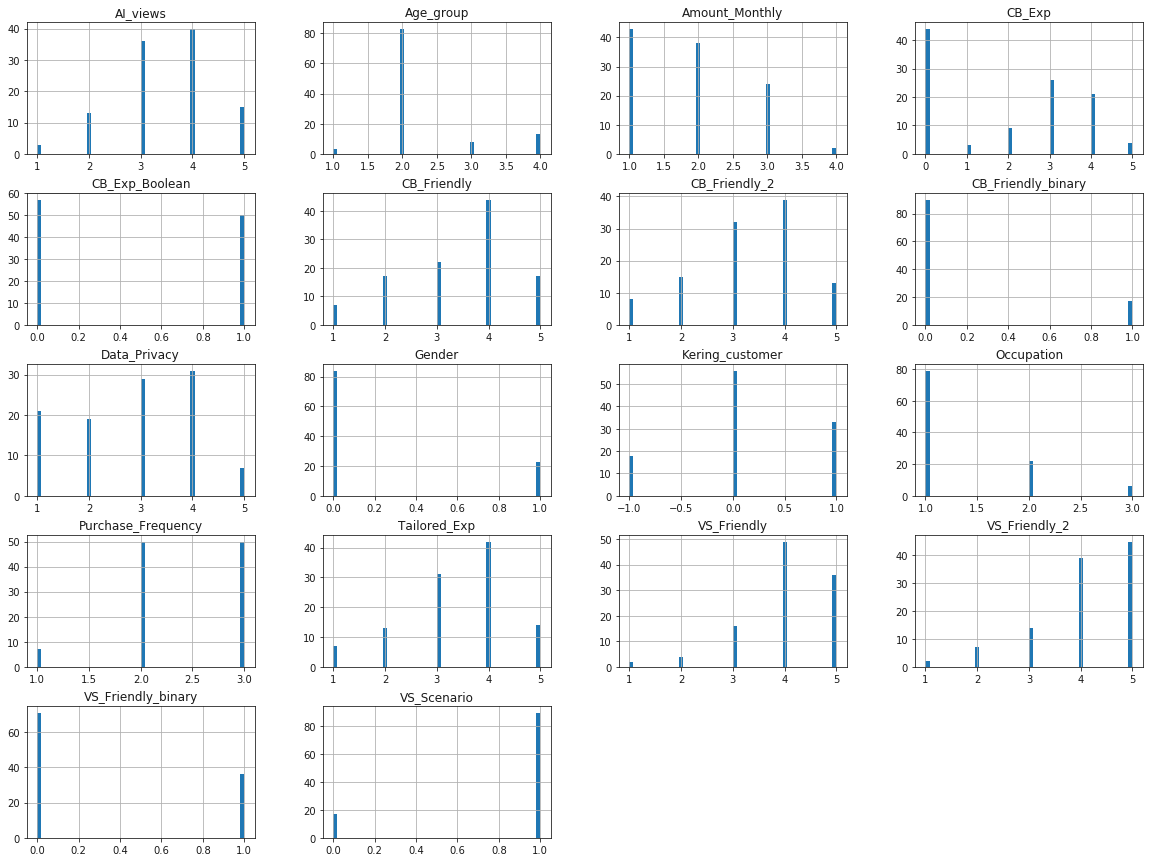

In [686]:
%matplotlib inline
df.hist(bins=50, figsize =(20,15))
plt.show()

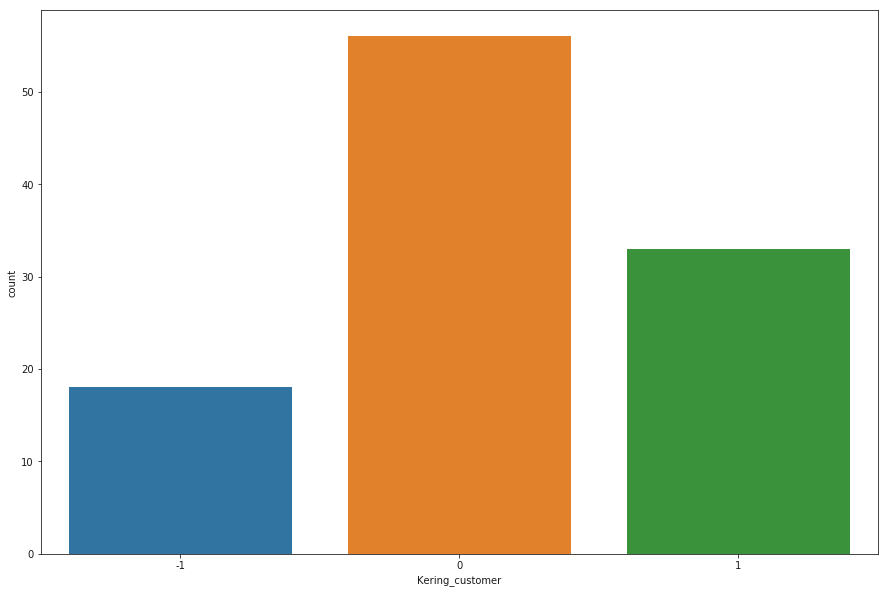

In [687]:
#Division of people on the basis of if they are Kering customers or not
plt.figure(figsize = (15,10))
sns.countplot(x='Kering_customer', data=df)

## Model training/validation
This contains a breakdown of how our model was trained and evaluated.
To evaluate our models we will use a different set of metrics:
- Accuracy measure
- Precision measure
- Brier Score Loss
- f1 score
- ROC-AUC

### Define predictors and target values
Let's define the predictor features and the target features. 

In [713]:
#drop the non numeric attributes
df_analysis = df

# Delete the "Work_Place" column from the dataframe
df_analysis = df_analysis.drop("Work_Place", axis=1)

# Delete the "Industry" column from the dataframe
df_analysis = df_analysis.drop("Industry", axis=1)

# Delete the "LB_consumer" column from the dataframe
df_analysis = df_analysis.drop("LB_consumer", axis=1)

# Delete the "Outfit" column from the dataframe
df_analysis = df_analysis.drop("Outfit", axis=1)

# Delete the "VS_Friendly_2" column from the dataframe
df_analysis = df_analysis.drop("VS_Friendly_2", axis=1)

# Delete the "VS_Friendly" column from the dataframe
df_analysis = df_analysis.drop("VS_Friendly" , axis=1)

In [714]:
#Converting the list types into the highest value (int) such that the customer segment infers the highest segment they are willing to pay for. 
for i in range(0, len(df_analysis.Customer_Segment)):
    df_analysis['Customer_Segment'][i] = max(df_analysis['Customer_Segment'][i])
    df_analysis['Customer_Segment'][i] = int(df_analysis['Customer_Segment'][i])
    df_analysis['Purchase_Platform'][i] = min(df_analysis['Purchase_Platform'][i])
    df_analysis['Purchase_Platform'][i] = int(df_analysis['Purchase_Platform'][i])


In [715]:

target = 'VS_Friendly_binary'
predictors = ['Age_group', 'Gender', 'Occupation', 
       'Purchase_Frequency', 'Amount_Monthly', 
       'Kering_customer', 'Customer_Segment', 'Purchase_Platform', 'AI_views',
       'VS_Scenario',
       'CB_Exp_Boolean', 'CB_Exp', 'CB_Friendly', 'CB_Friendly_2',
       'Tailored_Exp', 'Data_Privacy',
       'CB_Friendly_binary']


### Split the data into training set and test set
Let's define the training set and the validation set.

In [716]:
X = df_analysis.loc[:, df_analysis.columns!='VS_Friendly_binary'].values
y = df_analysis['VS_Friendly_binary'].values

In [717]:
# split the df into train and test, it is important these two do not communicate during the training
X_train1, X_test, y_train1, y_test= train_test_split(X, y , test_size=0.20, random_state= 30, shuffle=True )

In [718]:
# split the df into train and valid
X_train, X_valid, y_train, y_valid= train_test_split(X_train1, y_train1 , test_size=0.20, random_state= 30, shuffle=True )

### Normalising the data: Feature Scaling 
Feature scaling through standardization (or Z-score normalization) can be an important preprocessing step for many machine learning algorithms. Standardization involves rescaling the features such that they have the properties of a standard normal distribution with a mean of zero and a standard deviation of one.

While many algorithms (such as SVM, K-nearest neighbors, and logistic regression) require features to be normalized,

In [719]:
range_train = (X_train-X_train.min()).max()
X_train_scaled = (X_train - X_train.min())/range_train
range_valid = (X_valid-X_valid.min()).max()
X_valid_scaled = (X_valid - X_valid.min())/range_valid

### Logistic Regression

It is an industry standard that performs well. We don't expect the data to be linearly separable which is why Random Forest and Kernel-SVM might perform better.

In [807]:
from sklearn.linear_model import LogisticRegression

classifier_log = LogisticRegression(random_state = 0, penalty = 'l1')
classifier_log.fit( X_train, y_train )
y_pred1 = classifier_log.predict( X_valid )



cm = confusion_matrix( y_valid, y_pred1 )

scoresLOG = cross_val_score( classifier_log, X_train, y_train, cv=10)

acc_log = accuracy_score(y_true = y_valid, y_pred = y_pred1)
prec_log = precision_score(y_valid, y_pred1)
roc_log = roc_auc_score(y_true = y_valid, y_score= y_pred1)
bri_log = brier_score_loss(y_true= y_valid, y_prob=y_pred1)
f1_log = f1_score(y_true= y_valid, y_pred= y_pred1,average='binary')

results = pd.DataFrame([['Logistic Regression', acc_log, prec_log, roc_log, bri_log, f1_log]],
               columns = ['Model', 'Accuracy', 'Precision', 'ROC-AUC', 'Brier','F1 Score'])


### RBF-Kernel SVM

Support vector machines (SVMs) are a set of powerful supervised
learning techniques used for classification and regression.
Their basic principle is to construct a maximum-margin separating
hyperplane in some transformed feature space. SVMs are particularly well suited for classification of complex but small or medium-sized datasets like ours.

In [808]:
# It takes some time to run 5-10min
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import brier_score_loss
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

classifier_SVM = SVC(kernel="rbf",class_weight ='balanced')
classifier_SVM.fit( X_train, y_train )
y_pred_SVM = classifier_SVM.predict(X_valid)

cm = confusion_matrix( y_valid, y_pred_SVM )
scoresSVC = cross_val_score(classifier_SVM, X_train, y_train, cv=10)

acc_SVM = accuracy_score(y_true = y_valid, y_pred = y_pred_SVM)
prec_SVM = precision_score(y_valid, y_pred_SVM)
roc_SVM = roc_auc_score(y_true = y_valid, y_score= y_pred_SVM)
bri_SVM = brier_score_loss(y_true= y_valid, y_prob=y_pred_SVM)
f1_SVM = f1_score(y_true= y_valid, y_pred= y_pred_SVM,average='binary')


model_results = pd.DataFrame([['SVM (RBF)', acc_SVM, prec_SVM, roc_SVM, bri_SVM, f1_SVM]],
               columns = ['Model', 'Accuracy', 'Precision', 'ROC-AUC', 'Brier','F1 Score'])

results = results.append(model_results, ignore_index = True)

### Gaussian Naive Bayes (Generative Classification)
The Naive Bayes Classifier technique is based on the Bayesian theorem with strong (naive) independence assumptions between the features. It is particularly suited when the dimensionality of the inputs is high. Despite its simplicity, Naive Bayes can often outperform more sophisticated classification methods.

In [809]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit( X_train, y_train )
y_pred_nb = classifier_nb.predict( X_valid )

acc_nb = accuracy_score(y_true = y_valid, y_pred = y_pred_nb)
prec_nb = precision_score(y_valid, y_pred_nb)
roc_nb = roc_auc_score(y_true = y_valid, y_score= y_pred_nb)
bri_nb = brier_score_loss(y_true= y_valid, y_prob=y_pred_nb)
f1_nb = f1_score(y_true= y_valid, y_pred= y_pred_nb,average='binary')

model_results = pd.DataFrame([['Naive Bayes', acc_nb, prec_nb, roc_nb, bri_nb, f1_nb]],
               columns = ['Model', 'Accuracy', 'Precision', 'ROC-AUC', 'Brier','F1 Score'])

results = results.append(model_results, ignore_index = True)

### Decision Tree

Decision Tree is sensitive to small changes in the data, leading to different results. For this reason, it is common to use ensembles such as Random Forest to avoid this risk.

There are a few parameters to be settle for the classifier, such as the function to determine the quality of a split, or how deep the tree has to be. We will first test it with a random choice of those parameters and then choose our hyperparameters with k-fold cross validation to avoid overfitting and underfitting.



In [810]:
from sklearn.tree import DecisionTreeClassifier

#create the classifier
classifier = DecisionTreeClassifier(max_depth=3, random_state=14) 
# training the classifier
classifier.fit(X_train, y_train)
# do our predictions on the test
predictions = classifier.predict(X_valid)
# see how good we did on the test
acc_dec = accuracy_score(y_true = y_valid, y_pred = predictions)
prec_dec = precision_score(y_valid, predictions)
roc_dec = roc_auc_score(y_true = y_valid, y_score= predictions)
bri_dec = brier_score_loss(y_true= y_valid, y_prob=predictions)
f1_dec = f1_score(y_true= y_valid, y_pred= predictions)

model_results = pd.DataFrame([['Decision Tree 1', acc_dec, prec_dec, roc_dec, bri_dec, f1_dec]],
               columns = ['Model', 'Accuracy', 'Precision', 'ROC-AUC', 'Brier','F1 Score'])

results = results.append(model_results, ignore_index = True)

In [811]:
# define the parameters grid
param_grid = {'max_depth': np.arange(5, 12),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [20,100],
             'min_samples_split': [5, 10, 20]}

# create the grid
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5, scoring= 'f1')


#training
grid_tree.fit(X_train, y_train)
#let's see the best estimator
print(grid_tree.best_estimator_)
#with its score
print(np.abs(grid_tree.best_score_))

# One outcome is:
"""

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=100,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
            
"""

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=100,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
0.5833333333333334


"\n\nDecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,\n            max_features=None, max_leaf_nodes=100,\n            min_impurity_decrease=0.0, min_impurity_split=None,\n            min_samples_leaf=1, min_samples_split=5,\n            min_weight_fraction_leaf=0.0, presort=False, random_state=None,\n            splitter='best')\n            \n"

In [812]:
#create the tuned classifier
classifier2 = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=100,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
# training the classifier
classifier2.fit(X_train, y_train)
# do our predictions on the test
predictions2 = classifier2.predict(X_valid)
# see how good we did on the test
acc_dec2 = accuracy_score(y_true = y_valid, y_pred = predictions2)
prec_dec2 = precision_score(y_valid, predictions2)
roc_dec2 = roc_auc_score(y_true = y_valid, y_score= predictions2)
bri_dec2 = brier_score_loss(y_true= y_valid, y_prob=predictions2)
f1_dec2 = f1_score(y_true= y_valid, y_pred= predictions2)
#printing our scores

model_results = pd.DataFrame([['Decision Tree Tuned', acc_dec2, prec_dec2, roc_dec2, bri_dec2, f1_dec2]],
               columns = ['Model', 'Accuracy', 'Precision', 'ROC-AUC', 'Brier','F1 Score'])

results = results.append(model_results, ignore_index = True)

### Bagging (Random Forest) 
Random forests are defined as a group of un-pruned classification
or regression trees, trained on bootstrap samples of the training
data using random feature selection in the process of tree
generation. After a large number of trees have been generated,
each tree votes for the most popular class. These tree voting procedures
are collectively defined as random forests.


In [813]:
from sklearn.ensemble import RandomForestClassifier
classifier_forest = RandomForestClassifier(n_estimators=10)
classifier_forest.fit( X_train, y_train )
y_pred_forest = classifier_forest.predict( X_valid )

cm = confusion_matrix( y_valid, y_pred_forest )

scoresRF = cross_val_score( classifier_forest, X_train, y_train, cv=10)
print("Mean RandomForest CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresRF.mean(), scoresRF.std() ))

# see how good we did on the test
acc_forest = accuracy_score(y_true = y_valid, y_pred = y_pred_forest)
prec_forest = precision_score(y_valid, y_pred_forest)
roc_forest = roc_auc_score(y_true = y_valid, y_score= y_pred_forest)
bri_forest = brier_score_loss(y_true= y_valid, y_prob=y_pred_forest)
f1_fo = f1_score(y_true= y_valid, y_pred= y_pred_forest)
#printing our scores

model_results = pd.DataFrame([['Random Forest', acc_forest, prec_forest, roc_forest, bri_forest, f1_fo]],
               columns = ['Model', 'Accuracy', 'Precision', 'ROC-AUC', 'Brier','F1 Score'])

results = results.append(model_results, ignore_index = True)

Mean RandomForest CrossVal Accuracy on Train Set 0.73, with std=0.14


In [814]:
from sklearn.model_selection import GridSearchCV
# Warning: it does take 10mins to run
# define the parameters grid
param_grid_forest = {'n_estimators': [2],
              'max_depth' : [12,15],
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [100,120],
             'min_samples_split': [2, 5]}


# create the grid
grid_forest = GridSearchCV(RandomForestClassifier(), param_grid_forest, cv = 10, scoring= 'accuracy')


#training
grid_forest.fit(X_train, y_train)
#let's see the best estimator
print(grid_forest.best_estimator_)
#with its score
print(np.abs(grid_forest.best_score_))

#The Result is:
'''
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='auto', max_leaf_nodes=100,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=2, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
            
'''

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=12, max_features='auto', max_leaf_nodes=120,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=2, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
0.7205882352941176


"\nRandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',\n            max_depth=12, max_features='auto', max_leaf_nodes=100,\n            min_impurity_decrease=0.0, min_impurity_split=None,\n            min_samples_leaf=1, min_samples_split=5,\n            min_weight_fraction_leaf=0.0, n_estimators=2, n_jobs=1,\n            oob_score=False, random_state=None, verbose=0,\n            warm_start=False)\n            \n"

In [815]:
classifier_forest_tuned = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=100,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

classifier_forest_tuned.fit(X_train, y_train)
clf = classifier_forest_tuned.fit(X_train, y_train)
y_pred_forest_tuned = classifier_forest_tuned.predict( X_valid )

cm = confusion_matrix( y_valid, y_pred_forest )

# see how good we did on the test
acc_forest_tuned = accuracy_score(y_true = y_valid, y_pred = y_pred_forest_tuned)
prec_forest_tuned = precision_score(y_valid, y_pred_forest_tuned)
roc_forest_tuned = roc_auc_score(y_true = y_valid, y_score= y_pred_forest_tuned)
bri_forest_tuned = brier_score_loss(y_true= y_valid, y_prob=y_pred_forest_tuned)
f1_fo_tuned = f1_score(y_true= y_valid, y_pred= y_pred_forest_tuned)
#printing our scores

model_results = pd.DataFrame([['Random Forest Tuned', acc_forest_tuned, prec_forest_tuned, roc_forest_tuned,
                               bri_forest_tuned, f1_fo_tuned]],
               columns = ['Model', 'Accuracy', 'Precision', 'ROC-AUC', 'Brier','F1 Score'])

results = results.append(model_results, ignore_index = True)



### Stacker Model

In [816]:
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.classifier import StackingClassifier

In [817]:
clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], 
                          meta_classifier=lr)

params = {'kneighborsclassifier__n_neighbors': [1, 5],
          'randomforestclassifier__n_estimators': [10, 50],
          'meta-logisticregression__C': [0.1, 10.0]}

grid = GridSearchCV(estimator=sclf, 
                    param_grid=params, 
                    cv=5,
                    refit=True)
grid.fit(X_train, y_train)

cv_keys = ('mean_test_score', 'std_test_score', 'params')

for r, _ in enumerate(grid.cv_results_['mean_test_score']):
    print("%0.3f +/- %0.2f %r"
          % (grid.cv_results_[cv_keys[0]][r],
             grid.cv_results_[cv_keys[1]][r] / 2.0,
             grid.cv_results_[cv_keys[2]][r]))

print('Best parameters: %s' % grid.best_params_)
print('Accuracy: %.2f' % grid.best_score_)

0.721 +/- 0.05 {'kneighborsclassifier__n_neighbors': 1, 'meta-logisticregression__C': 0.1, 'randomforestclassifier__n_estimators': 10}
0.706 +/- 0.05 {'kneighborsclassifier__n_neighbors': 1, 'meta-logisticregression__C': 0.1, 'randomforestclassifier__n_estimators': 50}
0.721 +/- 0.05 {'kneighborsclassifier__n_neighbors': 1, 'meta-logisticregression__C': 10.0, 'randomforestclassifier__n_estimators': 10}
0.676 +/- 0.04 {'kneighborsclassifier__n_neighbors': 1, 'meta-logisticregression__C': 10.0, 'randomforestclassifier__n_estimators': 50}
0.618 +/- 0.05 {'kneighborsclassifier__n_neighbors': 5, 'meta-logisticregression__C': 0.1, 'randomforestclassifier__n_estimators': 10}
0.691 +/- 0.02 {'kneighborsclassifier__n_neighbors': 5, 'meta-logisticregression__C': 0.1, 'randomforestclassifier__n_estimators': 50}
0.618 +/- 0.05 {'kneighborsclassifier__n_neighbors': 5, 'meta-logisticregression__C': 10.0, 'randomforestclassifier__n_estimators': 10}
0.691 +/- 0.02 {'kneighborsclassifier__n_neighbors':

In [818]:
#With GridSearchCV we have tuned our parameters, we will run our optimal stacked model:

clf1a = KNeighborsClassifier(n_neighbors=1)
clf2a = RandomForestClassifier(random_state=1,n_estimators=10)
clf3a = GaussianNB()
lra = LogisticRegression(C=0.1)
sclfa = StackingClassifier(classifiers=[clf1a, clf2a, clf3a], 
                          meta_classifier=lra)

sclfa.fit(X_train, y_train)
y_pred_stacker = sclfa.predict( X_valid )

cm = confusion_matrix( y_valid, y_pred_stacker )

# see how good we did on the test
acc_stack = accuracy_score(y_true = y_valid, y_pred = y_pred_stacker)
prec_stack = precision_score(y_valid, y_pred_stacker)
roc_stack = roc_auc_score(y_true = y_valid, y_score= y_pred_stacker)
bri_stack = brier_score_loss(y_true= y_valid, y_prob= y_pred_stacker)
f1_stack = f1_score(y_true= y_valid, y_pred= y_pred_stacker)

model_results = pd.DataFrame([['Stacker Model 1', acc_stack, prec_stack, roc_stack,
                               bri_stack, f1_stack]],
               columns = ['Model', 'Accuracy', 'Precision', 'ROC-AUC', 'Brier','F1 Score'])

results = results.append(model_results, ignore_index = True)


In [819]:
import xgboost as xgb
from xgboost import XGBClassifier
from time import time

clf1a = GaussianNB()
clf2a = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=120,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=2, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
clf3a = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

lra = LogisticRegression(C=0.1)
sclfa = StackingClassifier(classifiers=[clf1a, clf2a, clf3a], 
                          meta_classifier=lra)


sclfa.fit(X_train, y_train)
y_pred_stacker2 = sclfa.predict( X_valid )

cm = confusion_matrix( y_valid, y_pred_stacker )

# see how good we did on the test
acc_stack2 = accuracy_score(y_true = y_valid, y_pred = y_pred_stacker2)
prec_stack2 = precision_score(y_valid, y_pred_stacker2)
roc_stack2 = roc_auc_score(y_true = y_valid, y_score= y_pred_stacker2)
bri_stack2 = brier_score_loss(y_true= y_valid, y_prob= y_pred_stacker2)
f1_stack2 = f1_score(y_true= y_valid, y_pred= y_pred_stacker2)

model_results = pd.DataFrame([['Stacker Model 2', acc_stack2, prec_stack2, roc_stack2,
                               bri_stack2, f1_stack2]], columns = ['Model', 'Accuracy', 'Precision', 'ROC-AUC', 'Brier','F1 Score'])

results = results.append(model_results, ignore_index = True)


In [820]:
# Let's see how important the features are in this model:

def get_feature_importance(clsf, ftrs):
    imp = clsf.feature_importances_.tolist()
    feat = ftrs
    result = pd.DataFrame({'feat':feat,'score':imp})
    result = result.sort_values(by=['score'],ascending=False)
    return result

clf = clf2a.fit(X_train, y_train)


get_feature_importance(clf, predictors)

,feat,score
2,Occupation,0.161717
13,CB_Friendly_2,0.144873
15,Data_Privacy,0.144445
0,Age_group,0.142287
11,CB_Exp,0.090540
4,Amount_Monthly,0.071815
10,CB_Exp_Boolean,0.057500
8,AI_views,0.052337
5,Kering_customer,0.039008
14,Tailored_Exp,0.030413


In [821]:
get_feature_importance(classifier_forest, predictors)

,feat,score
8,AI_views,0.153693
15,Data_Privacy,0.109902
10,CB_Exp_Boolean,0.094764
11,CB_Exp,0.079733
6,Customer_Segment,0.077942
13,CB_Friendly_2,0.074207
2,Occupation,0.071512
5,Kering_customer,0.065851
14,Tailored_Exp,0.052027
12,CB_Friendly,0.045185


In [822]:
results

,Model,Accuracy,Precision,ROC-AUC,Brier,F1 Score
0,Logistic Regression,0.647059,0.600000,0.614286,0.352941,0.500000
1,SVM (RBF),0.705882,0.625000,0.707143,0.294118,0.666667
2,Naive Bayes,0.764706,0.714286,0.757143,0.235294,0.714286
3,Decision Tree 1,0.647059,0.571429,0.635714,0.352941,0.571429
4,Decision Tree Tuned,0.647059,0.571429,0.635714,0.352941,0.571429
5,Random Forest,0.705882,0.666667,0.685714,0.294118,0.615385
6,Random Forest Tuned,0.647059,0.600000,0.614286,0.352941,0.500000
7,Stacker Model 1,0.647059,0.571429,0.635714,0.352941,0.571429
8,Stacker Model 2,0.764706,0.800000,0.735714,0.235294,0.666667


In [825]:
clf1a = GaussianNB()
clf2a = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=120,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=2, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
clf3a = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

lra = LogisticRegression(C=0.1)
sclfa = StackingClassifier(classifiers=[clf1a, clf2a, clf3a], 
                          meta_classifier=lra)

sclfa.fit(X_train1, y_train1)
y_pred_stacker2 = sclfa.predict(X_test)

cm = confusion_matrix( y_test, y_pred_stacker2 )

# see how good we did on the test
acc_stack2 = accuracy_score(y_true = y_test, y_pred = y_pred_stacker2)
prec_stack2 = precision_score(y_test, y_pred_stacker2)
roc_stack2 = roc_auc_score(y_true = y_test, y_score= y_pred_stacker2)
bri_stack2 = brier_score_loss(y_true= y_test, y_prob= y_pred_stacker2)
f1_stack2 = f1_score(y_true= y_test, y_pred= y_pred_stacker2)

final_results = pd.DataFrame([['Stacker Model 2', acc_stack2, prec_stack2, roc_stack2, bri_stack2, f1_stack2]],
               columns = ['Model', 'Accuracy', 'Precision', 'ROC-AUC', 'Brier','F1 Score'])



In [826]:
print(final_results)

             Model  Accuracy  Precision   ROC-AUC     Brier  F1 Score
0  Stacker Model 2  0.772727        0.5  0.852941  0.227273  0.666667


## References

   Breiman, L. Machine Learning (1996) 24: 123. https://doi.org/10.1023/A:1018054314350

   Fawcett, T. (2006). An introduction to ROC analysis. Pattern Recognition Letters, 27, 861-874. 
    
   Friedman, J. (2001). Greedy function approximation: A gradient boosting machine.
Annals of Statistics, 29(5), 1189–1232.

   Friedman, J. (2002). Stochastic gradient boosting. Computational Statistics & Data
Analysis, 38(4), 367–378.
Hastie, T., Tibshirani, R., & F

   Hastie, T., Tibshirani, R., & Friedman, J. (2001). The elements of statistical learning, data mining, inference, and prediction. New York: Springer. Henley, W. E., & Hand, D. J. (1997). Construction of a k-nearest nei

   Huang, Y.-M., Hunga, C.-M., & Jiau, H. C. (2006). Evaluation of neural networks and data mining methods on a credit assessment task for class imbalance problem. Nonlinear Analysis: Real World Applications, 7, 720-747.
    
   Lei, P. and Wu, Q. (2007), Introduction to Structural Equation Modeling: Issues and Practical Considerations. Educational Measurement: Issues and Practice, 26: 33-43. doi:10.1111/j.1745-3992.2007.00099.x
    
   Lessmann, Stefan & Baesens, Bart & Seow, Hsin-Vonn & Thomas, Lyn. (2015). Benchmarking state-of-the-art classification algorithms for credit scoring: An update of research. European Journal of Operational Research. (doi:10.1016/j.ejor.2015.05.030). 10.1016/j.ejor.2015.05.030.
       
   Mantas C.J., Abellán J. (2014) Credal Decision Trees to Classify Noisy Data Sets. In: Polycarpou M., de Carvalho A.C.P.L.F., Pan JS., Woźniak M., Quintian H., Corchado E. (eds) Hybrid Artificial Intelligence Systems. HAIS 2014. Lecture Notes in Computer Science, vol 8480. Springer, Cham
    
   Nanni, L., & Lumini, A. (2009). An experimental comparison of ensemble of classifiers for bankruptcy prediction and credit scoring. Expert Syst. Appl., 36, 3028-3033.
    
   Partalas, Ioannis & Tsoumakas, Grigorios & Vlahavas, I. (2010). An ensemble uncertainty aware measure for directed hill climbing ensemble pruning. Machine Learning. 81. 257-282. 10.1007/s10994-010-5172-0. 
    
  Skurichina, M. & Duin, R. Pattern Anal Appl (2002) 5: 121. https://doi.org/10.1007/s100440200011
    



In [806]:
df.to_csv('df.csv', encoding='utf-8', index=False)
df_analysis.to_csv('df_analysis.csv', encoding='utf-8', index=False)